In [1]:
%matplotlib inline
from __future__ import print_function
import ganymede
ganymede.configure('uav.beaver.works')
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import YouTubeVideo, HTML
sym.init_printing(use_latex = "mathjax")

## Add your name below

In [2]:
ganymede.name('Spencer Ng')

In [3]:
def check(p): ganymede.update(p, True)
check(0)

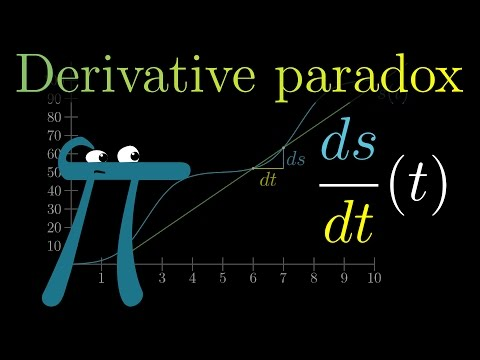

In [4]:
YouTubeVideo('9vKqVkMQHKk', width=560, height=315) # Video by http://www.3blue1brown.com/

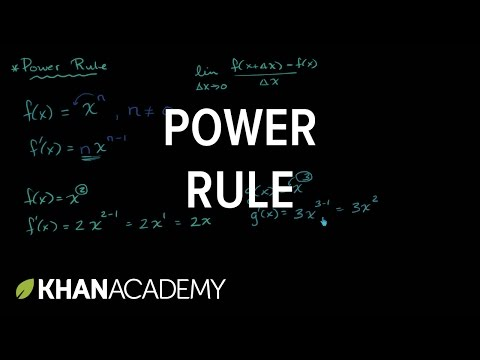

In [5]:
YouTubeVideo('bRZmfc1YFsQ', width=560, height=315) #Note: All Khan Academy content is available for free at khanacademy.org

### Power Rule

The derivative of $x^n$ is $nx^{n-1}$

[Read more](https://www.mathsisfun.com/calculus/power-rule.html)

[Other derivative rules](https://www.mathsisfun.com/calculus/derivatives-rules.html)

In [6]:
# Creating algebraic symbols 
x = sym.symbols('x')
x

x

In [7]:
x = sym.symbols('x')
expr = x ** 2
expr

 2
x 

In [6]:
sym.Derivative(expr) # does not actually compute the derivative

d ⎛ 2⎞
──⎝x ⎠
dx    

In [7]:
sym.Derivative(expr).doit()

2⋅x

In [8]:
sym.diff(expr) #equivalent to doit()

2⋅x

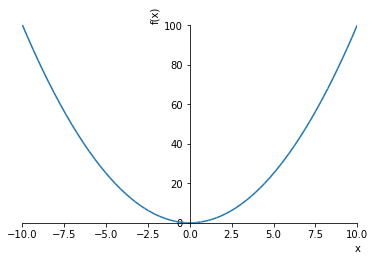

In [9]:
sym.plot(expr);

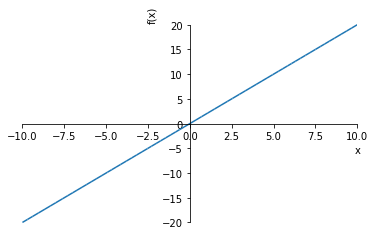

In [10]:
sym.plot(sym.diff(expr));

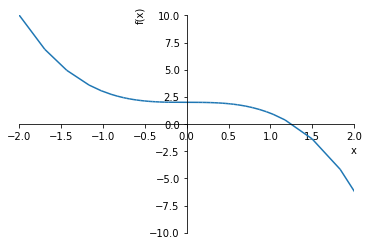

In [9]:
x = sym.symbols('x')
expr = -x ** 3 + 2

sym.plot(expr, xlim=(-2, 2), ylim=(-10, 10));

In [10]:
sym.Derivative(expr)

d ⎛   3    ⎞
──⎝- x  + 2⎠
dx          

In [13]:
sym.Derivative(expr).doit()

    2
-3⋅x 

In [80]:
x = sym.symbols('x')
y = sym.symbols('y')
expr = sym.cos(x**2)+y**2+5
sym.Derivative(expr,x).doit()

        ⎛ 2⎞
-2⋅x⋅sin⎝x ⎠

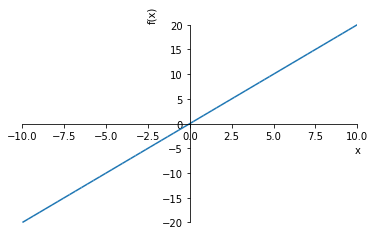

In [8]:
sym.plot(sym.diff(expr));

Now, let's generate a fake one-dimensional signal:

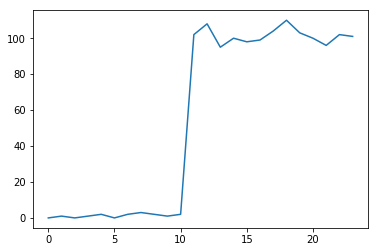

In [11]:
ys = np.array([0, 1, 0, 1, 2, 0, 2, 3, 2, 1, 2, 102, 108,  95, 100,  98,  99, 104, 110, 103, 100,  96, 102, 101])

fig,ax = plt.subplots()
ax.plot([i for i in range(len(ys))], ys);
check(1)

**Question:** Does this look like one of the above functions?

This looks similar to the power function (second function), except it is reflected across the y-axis.

Next, let's look at small chunks of our fake signal:

In [31]:
np.split(ys, len(ys)//2)
#check(2)

[array([0, 1]),
 array([0, 1]),
 array([2, 0]),
 array([2, 3]),
 array([2, 1]),
 array([  2, 102]),
 array([108,  95]),
 array([100,  98]),
 array([ 99, 104]),
 array([110, 103]),
 array([100,  96]),
 array([102, 101])]

**Question:** Which one of these chunks would you say is the most "interesting"?

The chunk containing `array([2,102])` is the most interesting, as it has the greatest change in value (difference between first and last element).

**Question** If we always divide up the signal as we did above, will we always find something "interesting"?

No, as the signal often contains subarrays with little change, such as only between 0 and 1. In this case, it's better to split the signal into subarrays with more elements.

## Convolutions

Derivatives and convolutions are one technique to help us tackle the above problem. 

First, you'll need to generate windows into the signal. Write a function that can generate windows with a user-supplied windowsize, and print them out.

Example outputs are provided below:

### A windowsize of 1:

```

        0   1   0   2   1   0   1 101 100  98 102 101
 0:     0
 1: ____    1
 2: ________    0
 3: ____________    2
 4: ________________    1
 5: ____________________    0
 6: ________________________    1
 7: ____________________________  101
 8: ________________________________  100
 9: ____________________________________   98
10: ________________________________________  102
11: ____________________________________________  101

	 :::::::::::::::::::::::::::::::::::::::::::::::::: 

i:    0 |  i + windowsize:     1  |  window:  [   0]
i:    1 |  i + windowsize:     2  |  window:  [   1]
i:    0 |  i + windowsize:     1  |  window:  [   0]
i:    2 |  i + windowsize:     3  |  window:  [   2]
i:    1 |  i + windowsize:     2  |  window:  [   1]
i:    0 |  i + windowsize:     1  |  window:  [   0]
i:    1 |  i + windowsize:     2  |  window:  [   1]
i:  101 |  i + windowsize:   102  |  window:  [ 101]
i:  100 |  i + windowsize:   101  |  window:  [ 100]
i:   98 |  i + windowsize:    99  |  window:  [  98]
i:  102 |  i + windowsize:   103  |  window:  [ 102]
i:  101 |  i + windowsize:   102  |  window:  [ 101]
```

### A windowsize of 2:

```
        0   1   0   2   1   0   1 101 100  98 102 101
 0:     0   1
 1: ____    1   0
 2: ________    0   2
 3: ____________    2   1
 4: ________________    1   0
 5: ____________________    0   1
 6: ________________________    1 101
 7: ____________________________  101 100
 8: ________________________________  100  98
 9: ____________________________________   98 102
10: ________________________________________  102 101

	 :::::::::::::::::::::::::::::::::::::::::::::::::: 

i:    1 |  i + windowsize:     3  |  window:  [   0,   1]
i:    0 |  i + windowsize:     2  |  window:  [   1,   0]
i:    2 |  i + windowsize:     4  |  window:  [   0,   2]
i:    1 |  i + windowsize:     3  |  window:  [   2,   1]
i:    0 |  i + windowsize:     2  |  window:  [   1,   0]
i:    1 |  i + windowsize:     3  |  window:  [   0,   1]
i:  101 |  i + windowsize:   103  |  window:  [   1, 101]
i:  100 |  i + windowsize:   102  |  window:  [ 101, 100]
i:   98 |  i + windowsize:   100  |  window:  [ 100,  98]
i:  102 |  i + windowsize:   104  |  window:  [  98, 102]
i:  101 |  i + windowsize:   103  |  window:  [ 102, 101]
```


### A windowsize of 3

```

        0   1   0   2   1   0   1 101 100  98 102 101
 0:     0   1   0
 1: ____    1   0   2
 2: ________    0   2   1
 3: ____________    2   1   0
 4: ________________    1   0   1
 5: ____________________    0   1 101
 6: ________________________    1 101 100
 7: ____________________________  101 100  98
 8: ________________________________  100  98 102
 9: ____________________________________   98 102 101

	 :::::::::::::::::::::::::::::::::::::::::::::::::: 

i:    0 |  i + windowsize:     3  |  window:  [   0,   1,   0]
i:    2 |  i + windowsize:     5  |  window:  [   1,   0,   2]
i:    1 |  i + windowsize:     4  |  window:  [   0,   2,   1]
i:    0 |  i + windowsize:     3  |  window:  [   2,   1,   0]
i:    1 |  i + windowsize:     4  |  window:  [   1,   0,   1]
i:  101 |  i + windowsize:   104  |  window:  [   0,   1, 101]
i:  100 |  i + windowsize:   103  |  window:  [   1, 101, 100]
i:   98 |  i + windowsize:   101  |  window:  [ 101, 100,  98]
i:  102 |  i + windowsize:   105  |  window:  [ 100,  98, 102]
i:  101 |  i + windowsize:   104  |  window:  [  98, 102, 101]
```

The below resources may be helpful::

## List Comprehensions

https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Generators_and_Comprehensions.html#List-&-Tuple-Comprehensions
    
## Numpy indexing with slices

http://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AccessingDataAlongMultipleDimensions.html#Slice-Indexing

## Formatting numbers in python

https://pyformat.info/#number

**input:** `'{:4d}'.format(42)`

**output:** `_` `_` `4` `2`

**input:**  `'{:06.2f}'.format(3.141592653589793)`

**output:**  `003.14`

## String concatenation

```python
>>> print('a' + 'b' + 'c')
abc
>>> print(''.join(['a', 'b', 'c']))
abc
>>> print(''.join(['a', 'b', 'c']))      
a,b,c
```

In [61]:
def make_windows(sequence, windowsize):
    str_to_print = '   '
    for num in sequence:
        str_to_print = str_to_print + str('{:3d}'.format(num)) + ' '
    print(str_to_print)
    
    for i in range(len(sequence)-windowsize+1):
        str_to_print = str(i) + ': '
        for j in range(i*4):
            str_to_print = str_to_print + '-'
        window = sequence[i:i+windowsize]
        for num in window:
            str_to_print = str_to_print + str('{:3d}'.format(num)) + ' '
        print(str_to_print)

In [62]:
series = [0, 1, 0, 2, 1, 0, 1, 101, 100, 98, 102, 101]


make_windows(sequence=series, windowsize=1)
make_windows(sequence=series, windowsize=2)
make_windows(sequence=series, windowsize=3)

check(3)

     0   1   0   2   1   0   1 101 100  98 102 101 
0:   0 
1: ----  1 
2: --------  0 
3: ------------  2 
4: ----------------  1 
5: --------------------  0 
6: ------------------------  1 
7: ----------------------------101 
8: --------------------------------100 
9: ------------------------------------ 98 
10: ----------------------------------------102 
11: --------------------------------------------101 
     0   1   0   2   1   0   1 101 100  98 102 101 
0:   0   1 
1: ----  1   0 
2: --------  0   2 
3: ------------  2   1 
4: ----------------  1   0 
5: --------------------  0   1 
6: ------------------------  1 101 
7: ----------------------------101 100 
8: --------------------------------100  98 
9: ------------------------------------ 98 102 
10: ----------------------------------------102 101 
     0   1   0   2   1   0   1 101 100  98 102 101 
0:   0   1   0 
1: ----  1   0   2 
2: --------  0   2   1 
3: ------------  2   1   0 
4: ----------------  1   0   1 
5: ------

## When you are done:

Generate some example outputs in this notebook.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 